In [1]:
import gym, gym_futbol_v1
import numpy as np
import pymunk.matplotlib_util
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
from gym_futbol_v1.envs import Side
from training import ppo2_mlp_policy_train
from stable_baselines import PPO2

Loading chipmunk for Darwin (64bit) [/Users/jim/Library/Python/3.7/lib/python/site-packages/pymunk/libchipmunk.dylib]
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



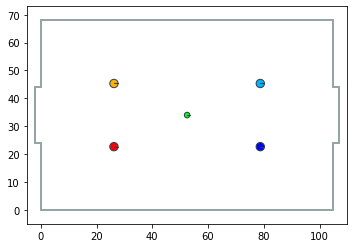

[[52.5        34.          0.          0.        ]
 [26.25       22.66666667  0.          0.        ]
 [26.25       45.33333333  0.          0.        ]
 [78.75       22.66666667  0.          0.        ]
 [78.75       45.33333333  0.          0.        ]]
[[ 0.          0.          0.          0.        ]
 [-0.47297297 -0.33333333  0.          0.        ]
 [-0.47297297  0.33333333  0.          0.        ]
 [ 0.47297297 -0.33333333  0.          0.        ]
 [ 0.47297297  0.33333333  0.          0.        ]]


In [2]:
env = gym.make("futbol-v1")
env.render()
print(env.reset().reshape((-1,4)))
print(env.normalize_observation_array(env.reset()).reshape((-1,4)))

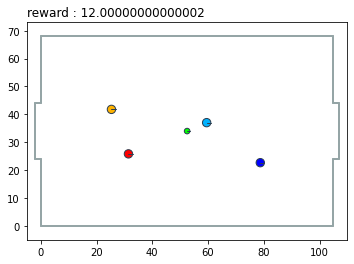

In [3]:
done = False
total_reward = 0
for _ in range(20):
    # action = np.reshape(env.action_space.sample(), -1)
    action = np.array([0,0,0,3])
    ob, reward, done, info = env.step(action, team_side=Side.right)

    plt.clf()
    title_str = ("reward : " + str(reward))
    padding = 5
    ax = plt.axes(xlim=(0 - padding, env.WIDTH + padding), ylim=(0 - padding, env.HEIGHT + padding))
    ax.set_aspect("equal")
    o = pymunk.matplotlib_util.DrawOptions(ax)
    env.space.debug_draw(o)
    plt.title(title_str, loc = 'left')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    total_reward += reward

In [4]:
env.reset()

array([52.5       , 34.        ,  0.        ,  0.        , 26.25      ,
       22.66666667,  0.        ,  0.        , 26.25      , 45.33333333,
        0.        ,  0.        , 78.75      , 22.66666667,  0.        ,
        0.        , 78.75      , 45.33333333,  0.        ,  0.        ])

In [5]:
model, save_dir = ppo2_mlp_policy_train(time_step=10**4)

--------------------------------------
| approxkl           | 0.0002888392  |
| clipfrac           | 0.0           |
| ep_len_mean        | 300           |
| ep_reward_mean     | -564          |
| explained_variance | -0.000141     |
| fps                | 915           |
| n_updates          | 1             |
| policy_entropy     | 6.437341      |
| policy_loss        | -0.0032223435 |
| serial_timesteps   | 128           |
| time_elapsed       | 1.69e-05      |
| total_timesteps    | 1024          |
| value_loss         | 9436.838      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00018509755 |
| clipfrac           | 0.0           |
| ep_len_mean        | 300           |
| ep_reward_mean     | -17.9         |
| explained_variance | 0.000185      |
| fps                | 2333          |
| n_updates          | 2             |
| policy_entropy     | 6.435844      |
| policy_loss        | -0.0018179595 |
| serial_timesteps   | 25

In [6]:
best_model = PPO2.load(save_dir + "/best_model")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


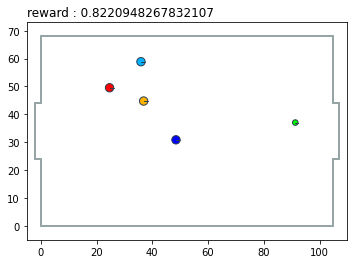

In [7]:
env = gym.make("futbol-v1")
done = False
total_reward = 0
obs = env.reset()
while not done:
    action, _ = best_model.predict(obs)
    ob, reward, done, _ = env.step(action)

    plt.clf()
    title_str = ("reward : " + str(reward))
    padding = 5
    ax = plt.axes(xlim=(0 - padding, env.WIDTH + padding), ylim=(0 - padding, env.HEIGHT + padding))
    ax.set_aspect("equal")
    o = pymunk.matplotlib_util.DrawOptions(ax)
    env.space.debug_draw(o)
    plt.title(title_str, loc = 'left')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    total_reward += reward

In [8]:
total_reward

641.8791691443502